# Clustering Model

In [1]:
# Import libraries
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

SEED = 42

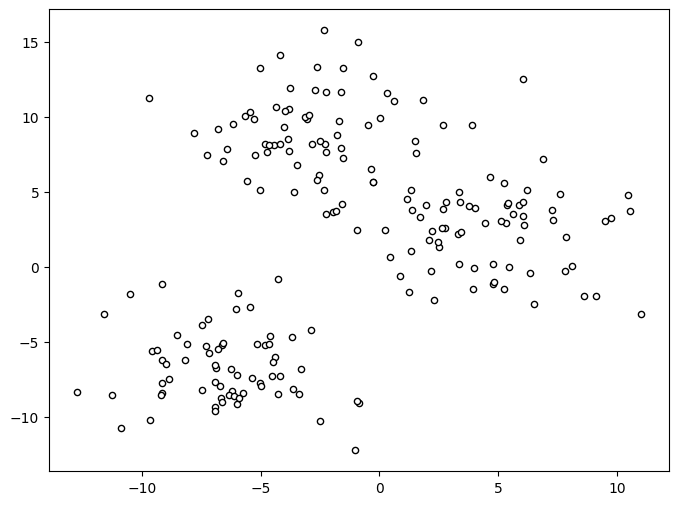

In [2]:
# Generate random data using make_blobs()
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = 200, centers = 3, cluster_std = 2.75, random_state = SEED)

plt.figure(figsize = (8, 6))
plt.scatter(x[:, 0], x[:, 1], s = 20, c = 'white', edgecolor = 'black')
plt.show()

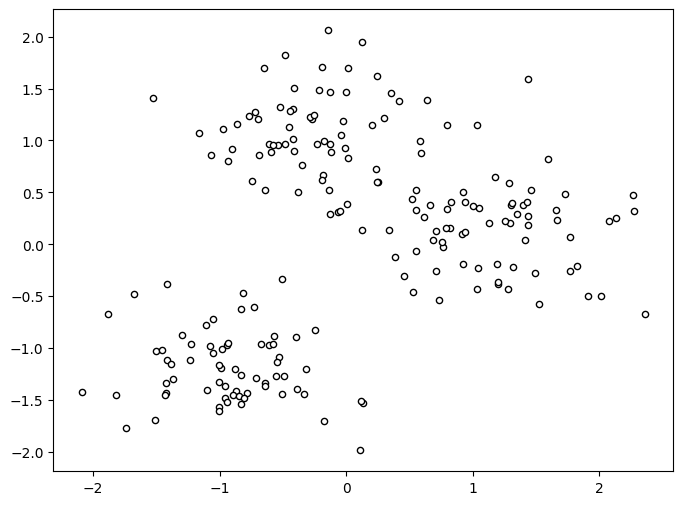

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

plt.figure(figsize = (8, 6))
plt.scatter(x[:, 0], x[:, 1], s = 20, c = 'white', edgecolor = 'black')
plt.show()

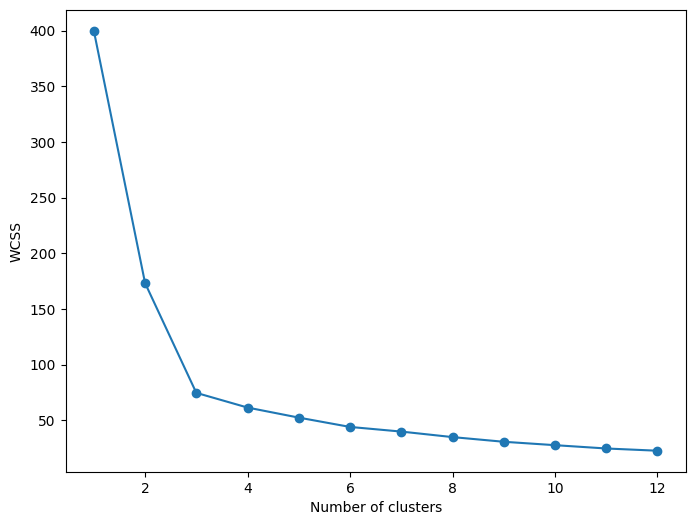

In [4]:
# Find optimal 'K' number of clusters
from sklearn.cluster import KMeans

N_CLUSTERS = 12
def elbow_method(n):
    wcss = []
    for i in range(1, n):
        km = KMeans(
            n_clusters = i, init = 'k-means++',
            random_state = SEED
        )
        km.fit(x)
        wcss.append(km.inertia_)
    return wcss

# Plot
plt.figure(figsize = (8, 6))
plt.plot(range(1, N_CLUSTERS + 1), elbow_method(N_CLUSTERS + 1), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
# Perform clustering based on elbow point decided before (K)
K = 3
kmeans = KMeans(n_clusters = K, random_state = SEED).fit(x)
y_pred = kmeans.predict(x)

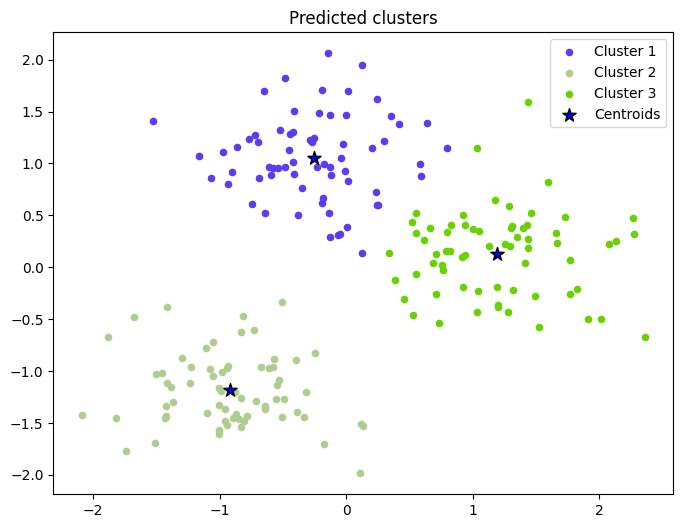

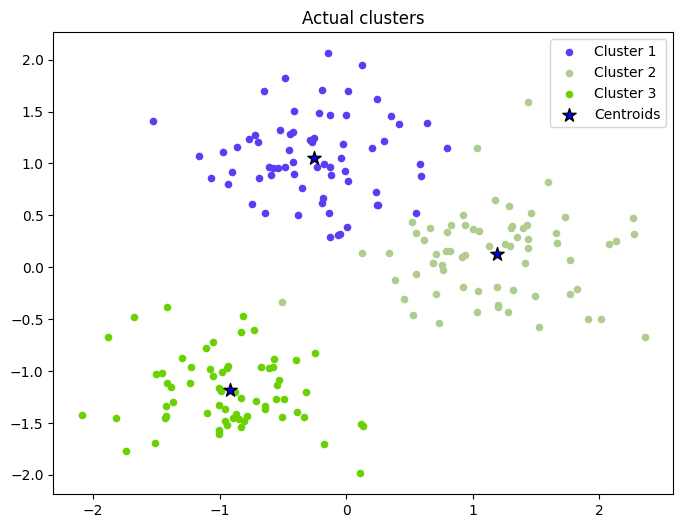

In [8]:
# Plot clusters of data points
def plot_clusters(k, data, colors, title = 'Default title'):
    plt.figure(figsize = (8, 6))
    for i in range(0, k):    
        plt.scatter(
            x[data == i, 0], x[data == i, 1],
            s = 20, c = colors[i],
            label=f'Cluster {i + 1}'
        )

    # Plot centroids
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s = 100, marker='*',
        c = 'blue', edgecolor='black',
        label = 'Centroids'
    )
    plt.legend(scatterpoints = 1)
    plt.title(title)
    plt.show()
    
def n_colors(n = 1):
    c = []
    for i in range(0, n):
        c.append([np.random.rand(3,)])
    return c

plt_color = n_colors(K)
plot_clusters(K, y_pred, colors = plt_color, title = 'Predicted clusters')
plot_clusters(K, y, colors = plt_color, title = 'Actual clusters')